In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

In [2]:
df = pd.read_csv(".\Fix CICIoT2023 10%.csv")

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Just Mine\AppData\Local\Temp\ipykernel_18916\2278516931.py:1: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv(".\Fix CICIoT2023 10%.csv")


In [3]:
print("Jumlah data:", df.shape)
print("Jumlah kelas unik:", df['Attack Type'].nunique())
print("Distribusi kelas:\n", df['Attack Type'].value_counts())

Jumlah data: (4644782, 47)
Jumlah kelas unik: 9
Distribusi kelas:
 Attack Type
DDoS              3380227
DoS                805163
Mirai              262017
BENIGN             109198
Network Attack      53730
Recon               31737
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64


In [4]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 1016288


In [5]:
print("Jumlah missing value per kolom:\n", df.isnull().sum())

Jumlah missing value per kolom:
 flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
A

In [6]:
df_clean = df.drop_duplicates().dropna()
print("Shape sesudah cleaning:", df_clean.shape)

Shape sesudah cleaning: (3628494, 47)


In [7]:
print('Nama Kolom :')
print(df_clean.columns)

Nama Kolom :
Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight',
       'Attack Type'],
      dtype='object')


In [8]:
print("Jumlah data Clean:", df_clean.shape)
print("Jumlah kelas unik Clean:", df_clean['Attack Type'].nunique())
print("Distribusi kelas Clean:\n", df_clean['Attack Type'].value_counts())

Jumlah data Clean: (3628494, 47)
Jumlah kelas unik Clean: 9
Distribusi kelas Clean:
 Attack Type
DDoS              2450878
DoS                737932
Mirai              242314
BENIGN             109198
Network Attack      53730
Recon               31732
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64


In [10]:
X = df_clean.drop(['Attack Type'], axis=1)
y = df_clean['Attack Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
size = len(X.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)
for batch in np.array_split(X_scaled, len(X) // 500):
    ipca.partial_fit(batch)

transformed_features = ipca.transform(X_scaled)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = y.values

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 95.59%


In [13]:
print("Dataset Baru yang Sudah Mengalami PCA:\n")
new_data

Dataset Baru yang Sudah Mengalami PCA:



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,Attack Type
0,2.708586,-1.826565,-2.469664,0.375558,0.104344,0.599855,-0.411174,-0.014532,0.685329,-1.041112,...,-0.001900,0.003804,-0.045738,-0.012105,0.298873,-0.090861,0.468793,0.406757,0.027848,Mirai
1,-1.654350,6.564881,-3.207034,0.405547,0.006955,0.156941,-0.117294,0.003253,0.244666,0.073048,...,-0.009672,-0.004924,-0.033779,-0.100353,-0.433227,-0.136729,0.164620,-0.101255,0.053182,DDoS
2,3.034338,-2.186362,-3.299882,0.377989,0.157512,1.494238,-0.494270,-0.054783,1.089224,-2.759706,...,-0.003029,0.007474,-0.123112,-0.029164,0.192559,1.005961,0.096255,-1.649309,-0.658032,Mirai
3,-0.652749,0.334990,1.595466,-0.654363,0.024098,-2.353428,-0.790791,-0.015012,-2.186837,-2.685652,...,-0.012132,0.011507,-0.090159,-0.137016,-0.890232,-0.307988,0.369507,0.092475,-0.192376,DDoS
4,-1.163401,0.062631,1.613863,-0.351171,0.008634,1.396554,0.345567,-0.034341,0.622018,-0.093095,...,-0.004914,-0.008658,-0.028494,-0.070947,-0.478776,-0.168040,0.090526,-0.176606,0.194628,DDoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628489,-0.652782,0.334971,1.595386,-0.654839,0.024096,-2.353239,-0.791337,-0.015009,-2.186919,-2.685548,...,-0.012132,0.011506,-0.090153,-0.137014,-0.890240,-0.308012,0.369487,0.092479,-0.192379,DDoS
3628490,-0.042560,0.792994,2.247425,-1.129879,0.032822,-2.898706,-0.786647,0.000414,-1.646427,-2.432922,...,-0.040846,-0.007071,-0.290494,-0.305982,-0.016372,2.593059,-0.837856,1.371348,-0.909908,DDoS
3628491,-0.984139,0.091225,1.635667,-0.347463,-0.002303,1.374498,0.355085,-0.030312,0.571881,-0.023521,...,-0.004446,-0.006496,-0.038428,-0.062393,-0.283455,-0.419937,-0.046177,-0.130712,0.227044,DDoS
3628492,-0.707544,-1.393871,-1.091487,0.591264,0.032738,-0.671314,-0.267359,0.029417,0.371014,0.409543,...,-0.003872,-0.015076,0.074441,0.023363,0.107173,-0.370831,-0.220032,0.315409,-0.220330,DDoS


In [12]:
print("Explained Variance per Component:")
for i, var in enumerate(ipca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

print(f"\nTotal Variansi Dijelaskan: {sum(ipca.explained_variance_ratio_):.2%}")

Explained Variance per Component:
PC1: 19.12%
PC2: 8.83%
PC3: 7.41%
PC4: 7.01%
PC5: 6.11%
PC6: 4.93%
PC7: 4.49%
PC8: 4.13%
PC9: 4.09%
PC10: 3.82%
PC11: 2.82%
PC12: 2.37%
PC13: 2.28%
PC14: 2.27%
PC15: 2.27%
PC16: 2.27%
PC17: 2.27%
PC18: 2.25%
PC19: 2.00%
PC20: 1.40%
PC21: 1.23%
PC22: 1.15%
PC23: 1.05%

Total Variansi Dijelaskan: 95.59%


In [14]:
# Menampilkan bobot (loading) semua fitur terhadap PC1
pc1_loadings = ipca.components_[0]  # Baris pertama adalah PC1
# Misal features.columns adalah list nama fitur asli
pc1_df = pd.DataFrame({
    'Feature': X.columns,
    'PC1_Weight': pc1_loadings
}).sort_values(by='PC1_Weight', key=abs, ascending=False)

print(pc1_df)


            Feature    PC1_Weight
35              Max  3.226550e-01
36              AVG  3.193463e-01
33          Tot sum  3.151595e-01
41         Magnitue  3.089465e-01
37              Std  3.069166e-01
42           Radius  3.068203e-01
38         Tot size  3.065675e-01
44         Variance  2.488079e-01
43       Covariance  2.166818e-01
34              Min  2.049778e-01
18        rst_count  1.895795e-01
1     Header_Length  1.837315e-01
20            HTTPS  1.471716e-01
3          Duration  1.439293e-01
17        urg_count  1.283052e-01
11  ack_flag_number  1.196379e-01
8   syn_flag_number -6.831833e-02
2     Protocol Type  6.562918e-02
9   rst_flag_number -4.681144e-02
7   fin_flag_number -4.677754e-02
39              IAT  4.282737e-02
45           Weight  4.134197e-02
40           Number  4.131799e-02
14        ack_count -4.018277e-02
16        fin_count -3.438284e-02
26              TCP -3.056919e-02
27              UDP -2.205347e-02
30             ICMP -7.599422e-03
10  psh_flag_n

In [16]:
# Menampilkan bobot (loading) semua fitur terhadap PC1
pc2_loadings = ipca.components_[1]  # Baris pertama adalah PC1
# Misal features.columns adalah list nama fitur asli
pc2_df = pd.DataFrame({
    'Feature': X.columns,
    'PC2_Weight': pc2_loadings
}).sort_values(by='PC2_Weight', key=abs, ascending=False)

print(pc2_df)


            Feature    PC2_Weight
14        ack_count  4.359127e-01
9   rst_flag_number  4.348453e-01
7   fin_flag_number  4.344194e-01
16        fin_count  3.954241e-01
26              TCP  2.966097e-01
27              UDP -2.273546e-01
2     Protocol Type -2.038759e-01
20            HTTPS  1.104602e-01
34              Min -1.082287e-01
11  ack_flag_number  9.261354e-02
18        rst_count  7.892998e-02
19             HTTP  7.625826e-02
30             ICMP -6.895280e-02
37              Std  6.886593e-02
42           Radius  6.881959e-02
3          Duration  6.683446e-02
43       Covariance  6.505862e-02
17        urg_count  5.853980e-02
15        syn_count  5.632634e-02
39              IAT  5.294235e-02
45           Weight  5.258636e-02
40           Number  5.257810e-02
41         Magnitue -4.905916e-02
35              Max  4.346623e-02
44         Variance  4.221062e-02
10  psh_flag_number  3.468621e-02
4              Rate -3.139818e-02
5             Srate -3.139818e-02
38         Tot

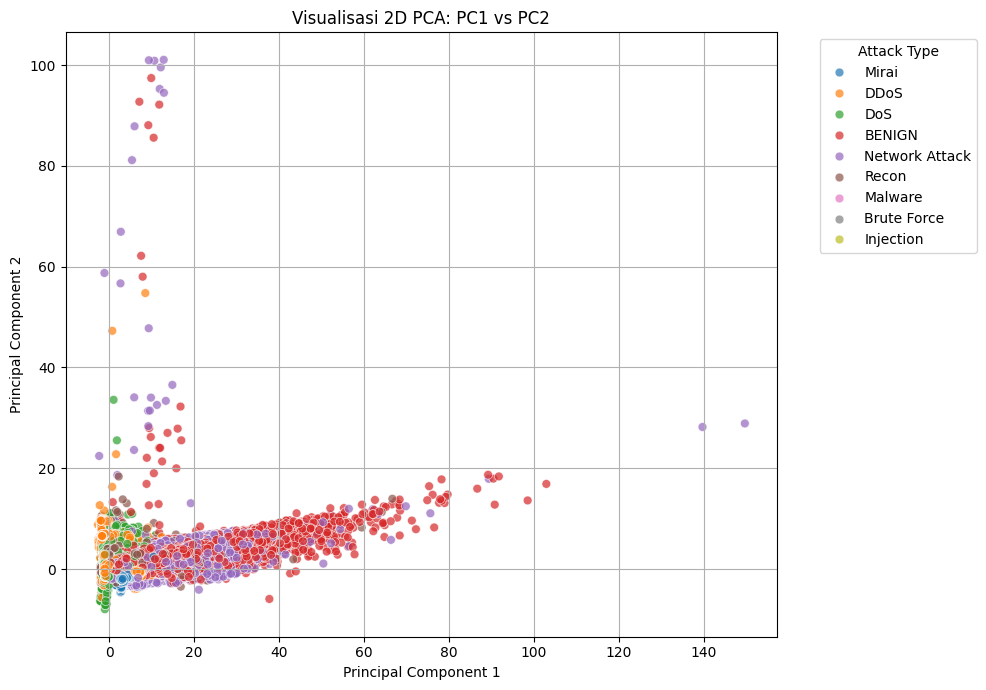

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=new_data,
    x='PC1', y='PC2',
    hue='Attack Type',
    palette='tab10',
    alpha=0.7,
    s=40
)
plt.title('Visualisasi 2D PCA: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


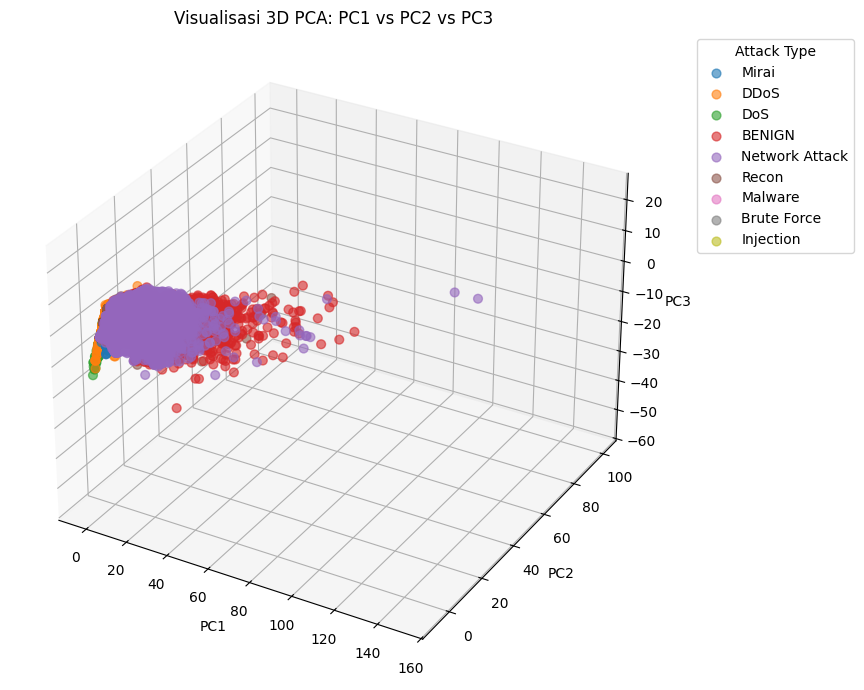

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Ambil warna unik untuk setiap label
labels = new_data['Attack Type'].unique()
colors = cm.tab10.colors

for i, label in enumerate(labels):
    subset = new_data[new_data['Attack Type'] == label]
    ax.scatter(
        subset['PC1'], subset['PC2'], subset['PC3'],
        label=label,
        color=colors[i % len(colors)],
        alpha=0.6,
        s=40
    )

ax.set_title('Visualisasi 3D PCA: PC1 vs PC2 vs PC3')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [19]:
print("Jumlah data IPCA 50% dari dataset sample 10%:", new_data.shape)
print("Jumlah kelas unik:", new_data['Attack Type'].nunique())
print("Distribusi kelas:\n", new_data['Attack Type'].value_counts())

Jumlah data IPCA 50% dari dataset sample 10%: (3628494, 24)
Jumlah kelas unik: 9
Distribusi kelas:
 Attack Type
DDoS              2450878
DoS                737932
Mirai              242314
BENIGN             109198
Network Attack      53730
Recon               31732
Brute Force          1288
Injection            1114
Malware               308
Name: count, dtype: int64


In [20]:
new_data.to_csv("CICIoT2023_IPCASTD10%.csv", index=False)
print("Dataset telah disimpan sebagai CICIoT2023_IPCASTD10%.csv")

Dataset telah disimpan sebagai CICIoT2023_IPCASTD10%.csv
